# **Projeto Final - Estimação da Pose de um Robô Móvel**

**Alunos:** André Paiva Conrado Rodrigues, Romualdo Oliveira Santos Filho

**Matéria:** ENGG64 - Visão Computacional - 2023.2

## 1 - Importação de dependências e configurações

In [1]:
import numpy as np
import cv2 as cv
import matplotlib as mpl
from matplotlib import pyplot as plt

## 2 - Funções de processamento do vídeo

In [2]:
def extract_frames(video_capture):
    frames = []
    while True:
        ret, frame = video_capture.read()
        if ret:
            frames.append(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
        else:
            break
    return frames

In [3]:
def gaussian_blur(frames):
    proc_frames = []
    for frame in frames:
        proc_frame = cv.GaussianBlur(frame, (5, 5), 0)
        proc_frames.append(proc_frame)
    return proc_frames

In [4]:
def color_mask(frames):
    proc_frames = []
    for frame in frames:
        mask1 = cv.inRange(cv.cvtColor(frame, cv.COLOR_RGB2HSV), (0, 120, 40), (20, 220, 125))
        mask2 = cv.inRange(cv.cvtColor(frame, cv.COLOR_RGB2HSV), (165, 120, 40), (180, 220, 125))
        mask = cv.bitwise_or(mask1, mask2)
        proc_frames.append(mask)
    return proc_frames

In [5]:
def erode_and_dilate(frames):
    proc_frames = []
    kernel_open1 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
    kernel_close = cv.getStructuringElement(cv.MORPH_ELLIPSE, (45, 45))
    kernel_open2 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7))
    for frame in frames: 
        proc_frame = cv.morphologyEx(frame, cv.MORPH_OPEN, kernel_open1)
        proc_frame = cv.morphologyEx(proc_frame, cv.MORPH_CLOSE, kernel_close)
        proc_frame = cv.morphologyEx(proc_frame, cv.MORPH_OPEN, kernel_open2)
        proc_frames.append(proc_frame)
        
    return proc_frames

In [6]:
def blob_extractor(frames):
    proc_frames = []
    for frame in frames:
        proc_frame = np.zeros(frame.shape, dtype=np.uint8)
        contours, hierarchy = cv.findContours(frame, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
        for i, cnt in enumerate(contours):
            if(cv.contourArea(cnt) >= 70 and \
               cv.contourArea(cnt) <= 8000 and \
               cv.arcLength(cnt, True) >= 80):
                cv.drawContours(proc_frame, [cnt], 0, (255), -1)
        proc_frames.append(proc_frame)
    return proc_frames

In [7]:
video_cap = cv.VideoCapture('images/Video1_husky.mp4')
frames = extract_frames(video_cap)
video_cap.release()
gaussian_frames = gaussian_blur(frames)
color_seg = color_mask(gaussian_frames)
eroded_and_dilated = erode_and_dilate(color_seg)
blobbed = blob_extractor(eroded_and_dilated)

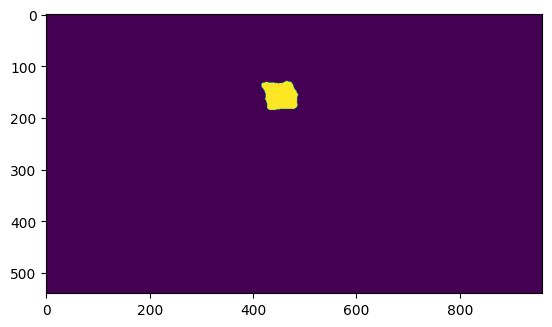

In [8]:
plt.imshow(blobbed[700])